<a href="https://colab.research.google.com/github/AislingGilder85/Food-Sales-Prediciton/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project One - Food Sales Prediction
- Aisling Gilder

In [52]:
import pandas as pd
filename = ('/content/drive/MyDrive/Coding Dojo Data Science/Project 1/sales_predictions.csv')
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Part Two

#### 1) How many rows and columns

In [53]:
df.info()
# There are 8523 rows and 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### 2)What are the datatypes of each variable

In [54]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### 3) Are there duplicates. If so, drop any duplicates

In [55]:
# Checking for duplicates
df.duplicated().sum()

0

In [56]:
# There no duplicates, but let's run the .drop function just to make sure
df = df.drop_duplicates()
df.duplicated().sum()

0

#### 4) Identify Missing Values

In [57]:
# there is missing Item_Weight and Outlet_Size data
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### 5)Decide on how to address the missing values and provide reasoning 

> We are missing data in both the Item_Weight and Outlet_Size columns
For the Item_Weight, we will impute the mean for the missing items. Almost all items at a grocery store will be in a small range of easy to move weights.
For the Outlet_Size, we will remove the column. This data category is based on the square footage of each location. However, it is stored as an object of small, medium, or hight, so we can not use the mean. Additionly, there is no defitinon of what those the classifications are based on. So, rather than removed so rows and lost all the good data from the other columns, we will simply remove this category.

In [58]:
# Removing Outlet_Size column
df.drop(columns='Outlet_Size', inplace=True)
# Imputing the mean for the missing Item_Weight data
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

#### 6)Confirm that there are no missing values after addressing them.

In [59]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

> We can address he inconsistance date by checking the .value_counts for each of our object dtype columns. They are: Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Location_Type

In [60]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

- Item_Identifier looks consistant

In [61]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [62]:
# Standardize the catagores to Low Fat and Regular only
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Item_Fat_Content is done


In [63]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

- Item_Type looks good

In [64]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

- Outlet_Identifier looks good

In [65]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

- Outlet_Location_Type looks good

#### 8) For any numerical columns, obtain the summary statistics of each (min, max, mean). These are Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales(subject to change!)

> We will use the .describe function on the data set to get a summary off all the numerical data columns


In [66]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Part Three
For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:
- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features. 

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


##Histograms

- Item Type

Text(0, 0.5, 'Item Count')

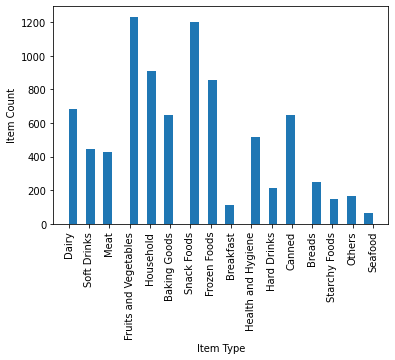

In [68]:
df['Item_Type'].hist(bins=35)
plt.xticks(rotation = 90)
plt.grid(False)
plt.xlabel('Item Type')
plt.ylabel('Item Count')

> The is an almost equal number for snack food and fruit & veggie items that are sold

- Item Weight




Text(0, 0.5, 'Item Count')

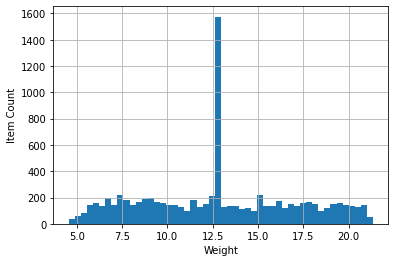

In [69]:
df['Item_Weight'].hist(bins=50)
plt.xlabel('Weight')
plt.ylabel('Item Count')

> Here we can see the effect we had when we choose to impute the mean weight for the cells with missing information. If we ignore the large spike that it caused, it looks like the weight is items is slight skewed towards the lighter side. But it is relativley flat through most of the values.

- Establishment Year

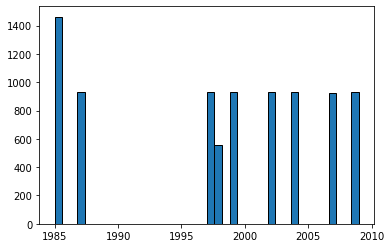

In [76]:
df['Outlet_Establishment_Year'].hist(bins=40,
                                     edgecolor='black')
plt.grid(False)

> Most locations were established in the late 1990's or after. I am curious as to what caused the gap we see from about 1988 to about 1996?

## Boxplot

- Boxplots of Item MRP and Outlet Sales

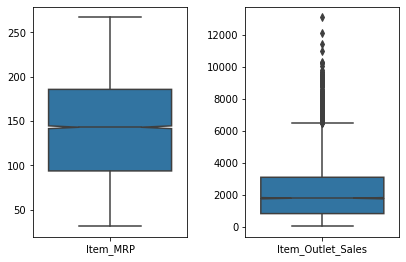

In [91]:
plt.subplot(1,2,1)
sns.boxplot(data=df[['Item_MRP']], notch=True)
plt.subplot(1,2,2)
sns.boxplot(data=df[['Item_Outlet_Sales']], notch=True)
plt.tight_layout(2)

> The many high outliers in the outlet sales is throwing of the scale of that plot. While this does tell us that some locations have stellar sales, lets remove them and check the plots again.

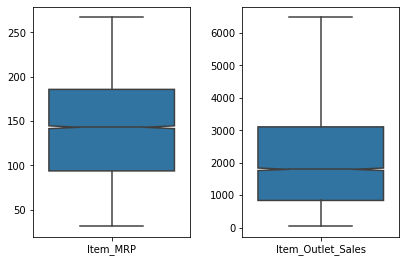

In [93]:
plt.subplot(1,2,1)
sns.boxplot(data=df[['Item_MRP']], notch=True)
plt.subplot(1,2,2)
sns.boxplot(data=df[['Item_Outlet_Sales']], notch=True, showfliers=False)
plt.tight_layout(2)

> As we can see, Item_MRP is relatively even distributed. The median line does show a slight bottom skew. This indicates that slightmore more products are priced under the median cost versus over it.
Item_Outlet_Sales whos the opposite. The median line is fairly low in the total range, show that more outlet sales than not are over the median line. Coupled with the outliers from before, this certainly is the case.

## Heatmaps

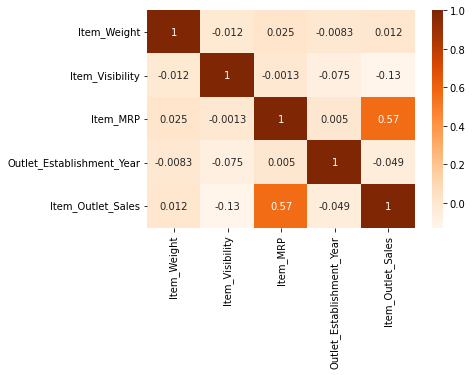

In [115]:
# set the variable corr as the dataframe with .corr run on it
corr = df.corr()
# produce heatmap with the new variable
sns.heatmap(corr, cmap='Oranges', annot=True)

> Most of our data columns do not indicate much correlation at all. It is interesting to note, though not statistacally vaulable, Item_Visibilty is negativly correlated with every other catagory
The one relationship that does show moderate correllation is between Item_MRP and Item_Outlet_Sales. This makes sense, as the more items cost, the more total sales value you make. 